<a href="https://colab.research.google.com/github/WheelerMLClub/DataScience/blob/main/PCA_the_easy_way_and_Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

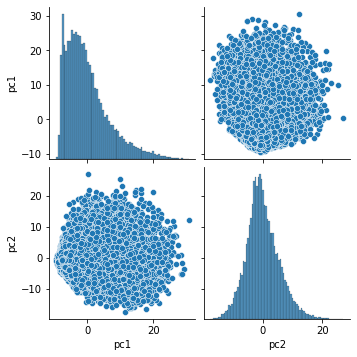

In [ ]:
#PCA the easy way
from sklearn.decomposition import PCA
from sklearn import preprocessing

data = pd.read_csv("/content/sample_data/mnist_train_small.csv")
labels = data.iloc[:,0]
data = preprocessing.scale(data)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
sns.pairplot(principalDf)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


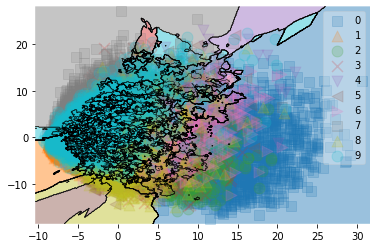

In [ ]:
#Stacked-Algorithms
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
classifier = KNeighborsClassifier(10)
classifier.fit(principalDf[:10000],labels[:10000])
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.2}
contourf_kwargs = {'alpha': 0.2}
plot_decision_regions(np.array(principalDf),np.array(labels),clf=classifier,scatter_kwargs=scatter_kwargs,scatter_highlight_kwargs=contourf_kwargs)

In [ ]:
np.average(classifier.predict(principalDf) == labels)

0.3992699634981749

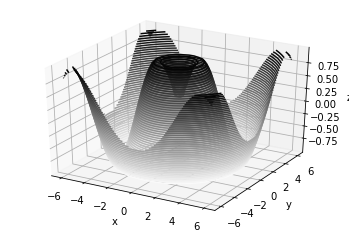

In [ ]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

def delfx(x,y):
    return (2*x*np.cos(np.sqrt(x**2+y**2)))/(2*np.sqrt(x**2+y**2))

def delfy(x,y):
    return (2*y*np.cos(np.sqrt(x**2+y**2)))/(2*np.sqrt(x**2+y**2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

# Code taken form matplotlib

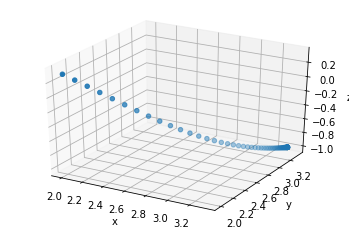

In [ ]:
# Find a local minimum using gradient descent

%matplotlib inline
iter_stop = 100
alpha = .1

starting_point = np.array([2,2])
points = [starting_point]

def calculate_gradients(point):
  return np.array([delfx(point[0],point[1]),delfy(point[0],point[1])])

for epoch in range(0,iter_stop):
  grads = calculate_gradients(points[-1])
  points.append(points[-1] - grads*alpha)


points = np.array(points)
values = f(points[:,0],points[:,1])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(points[:,0], points[:,1], values, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
